In [9]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

In [10]:
result_dir = Path(os.getcwd())

proj_dir = result_dir.parent

os.chdir(proj_dir)


In [11]:
from utils.results import SimulationResults

RUNID = "run0"

test0_results = SimulationResults(runids=[RUNID])

print(test0_results.var_list)
print(test0_results.timestep_output_ids)

['2m_temperature' 'abs_xgr' 'abs_zgr' 'angles' 'computational_time'
 'convective_heat_flux' 'cumulative_computational_time'
 'ground_enthalpy_distribution' 'ground_temperature_distribution'
 'latent_heat_flux' 'long_wave_radiation_flux' 'mean_wave_angle'
 'orbital_velocity' 'radiation_stress_xx' 'radiation_stress_xy'
 'radiation_stress_yy' 'run_up' 'sea_ice_cover' 'sea_surface_temperature'
 'solar_radiation_factor' 'solar_radiation_flux' 'storm_surge'
 'thaw_depth' 'total_heat_flux' 'velocity_magnitude' 'wave_energy'
 'wave_height' 'wind_direction' 'wind_velocity' 'xgr' 'zgr']
[  0  24  48  72  96 120 144 168 192]


In [22]:
test0_results.get_var_timeseries("computational_time")[RUNID]

[array(7.82763195),
 array(60.75216389),
 array(103.26374149),
 array(145.50098157),
 array(187.89175725),
 array(338.07395315),
 array(486.38640904),
 array(624.99212384),
 array(758.46674871)]

In [16]:
# xgr0 = test0_results.get_var_timestep("xgr", 0)[RUNID]
# zgr0 = test0_results.get_var_timestep("zgr", 0)[RUNID]

# xgr1416 = test0_results.get_var_timestep("xgr", 1416)[RUNID]
# zgr1416 = test0_results.get_var_timestep("zgr", 1416)[RUNID]

# plt.plot(xgr0, zgr0, label='t=0')
# plt.plot(xgr1416, zgr1416, label='t=1416')

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

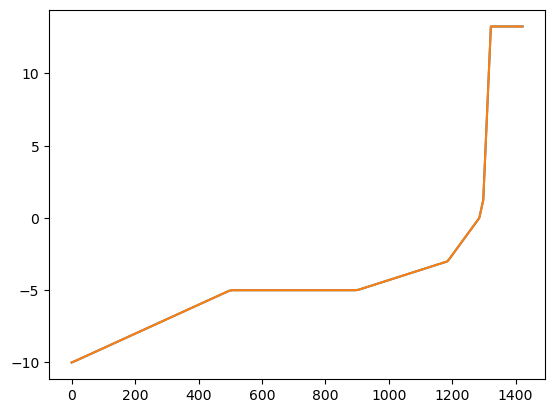

In [17]:
xgr0 = test0_results.get_var_timestep("xgr", 0)[RUNID]
zgr0 = test0_results.get_var_timestep("zgr", 0)[RUNID]

xgr96 = test0_results.get_var_timestep("xgr", 96)[RUNID]
zgr96 = test0_results.get_var_timestep("zgr", 96)[RUNID]

plt.plot(xgr0, zgr0, label='t=0')
plt.plot(xgr96, zgr96, label='t=1416')

print(zgr0 == zgr96)

So the bathymetry is not updating. What about temperature distribution?

In [18]:
abs_xgr0 = test0_results.get_var_timestep("abs_xgr", 0)[RUNID]
abs_zgr0 = test0_results.get_var_timestep("abs_zgr", 0)[RUNID]
ground_temperature_distribution0 = test0_results.get_var_timestep(
    "ground_temperature_distribution", 0)[RUNID]

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_47180\3226561936.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


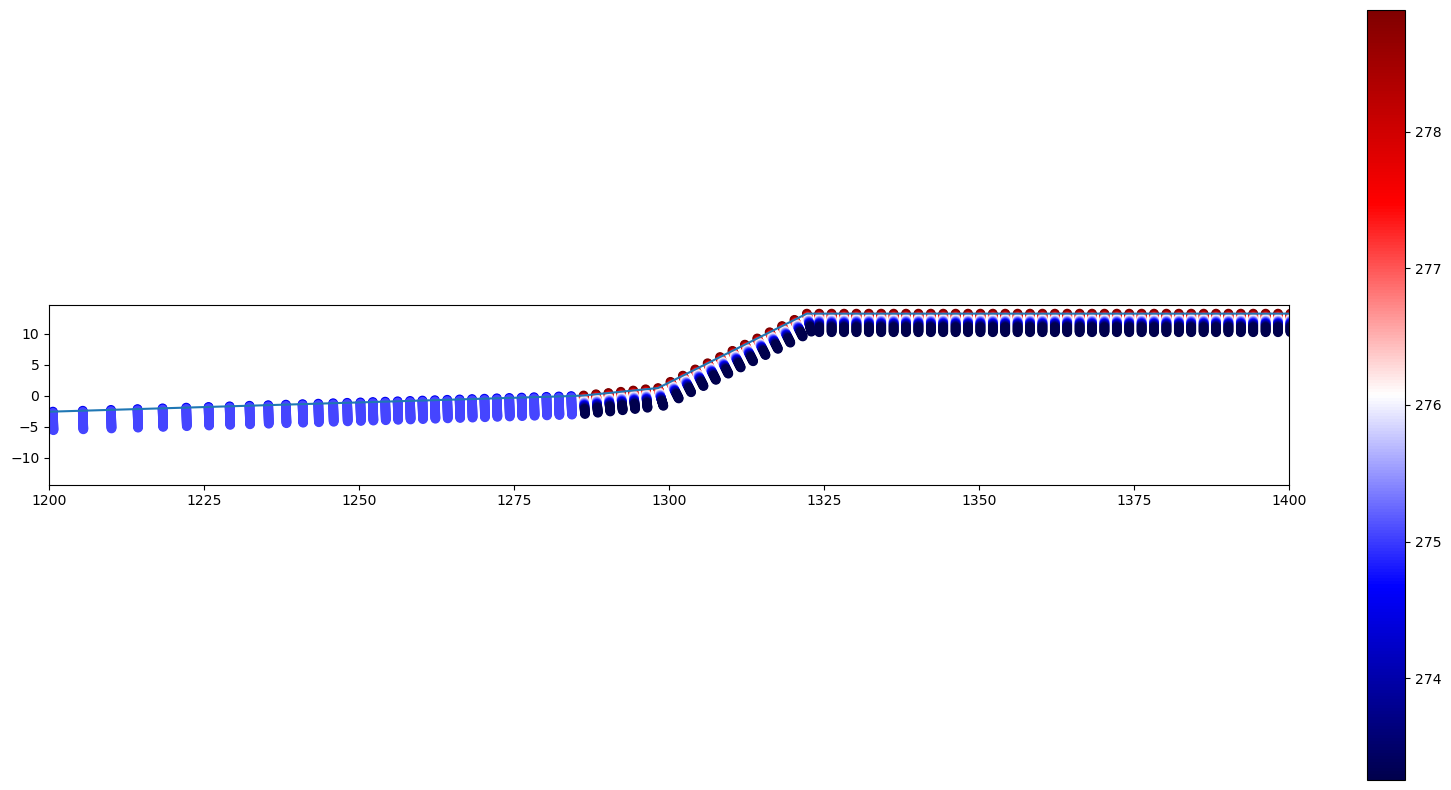

In [21]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(xgr0, zgr0, label='bathymetry')

scatter = ax.scatter(abs_xgr0, abs_zgr0, 
                     c=ground_temperature_distribution0, cmap='seismic')

sm = ScalarMappable(cmap='seismic')

sm.set_array(ground_temperature_distribution0)

plt.colorbar(sm, ax=ax)

ax.set_aspect("equal")

ax.set_xlim(1200, 1400)

fig.show()